1. Use PCA to reduce the dimensionality of a 2D dataset and visualize how much variance is captured.
1 Ans:- Please run the below code to to reduce the dimensionality of a 2D dataset and visualize how much variance is been captured.

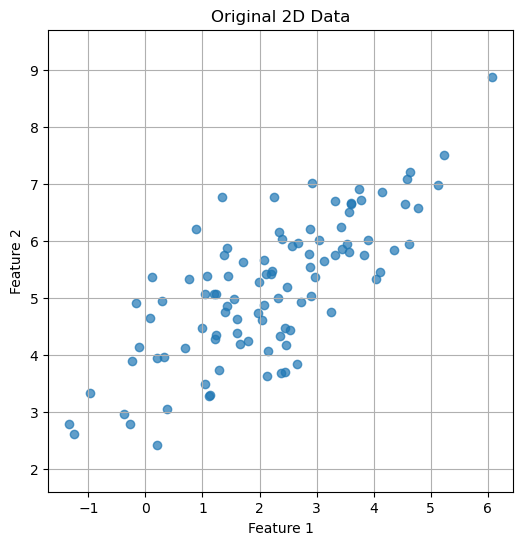

Eigenvalues are:
  λ1 = 3.3454
  λ2 = 0.4369

Eigenvectors (columns corresponding to λ1, λ2):
[[-0.79640776  0.60476002]
 [-0.60476002 -0.79640776]]




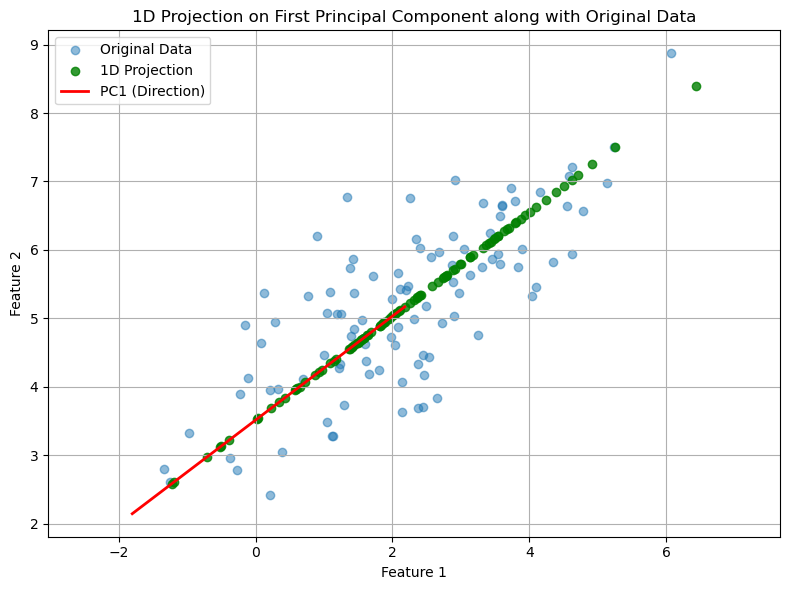

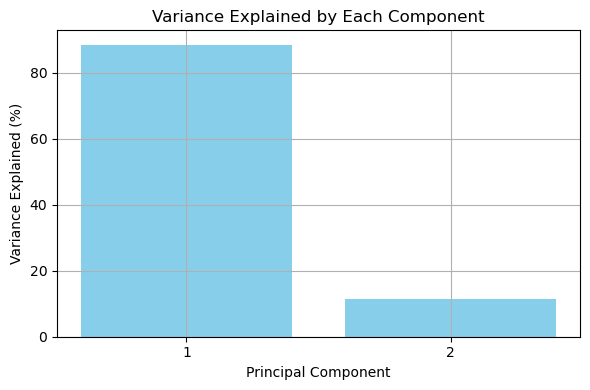

In [9]:
#Question 1 Solution Code
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Step 2: Plot the original data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.savefig("Original Data plot.png",dpi=300)
plt.show()

# Step 2: Center the data
X_centered = X - np.mean(X, axis=0)

# Step 3: Computing the Covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 4: Calculating Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalues are:")
for i, val in enumerate(eigenvalues, start=1):
    print(f"  λ{i} = {val:.4f}")

print("\nEigenvectors (columns corresponding to λ1, λ2):")
print(eigenvectors)
print("\n")

# Step 5: Project data onto the first principal component
pc1 = eigenvectors[:, 0]
projected_1d = X_centered @ pc1  

# Reconstruct the 1D projection back into 2D space for visualization
X_projected_2d = np.outer(projected_1d, pc1) + np.mean(X, axis=0)

# Step 6: Plot the 1D projection and Compare it with original
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label='Original Data', alpha=0.5)
plt.scatter(X_projected_2d[:, 0], X_projected_2d[:, 1], label='1D Projection', color='green', alpha=0.8)
plt.plot(
    [np.mean(X, axis=0)[0], np.mean(X, axis=0)[0] + pc1[0] * 5],
    [np.mean(X, axis=0)[1], np.mean(X, axis=0)[1] + pc1[1] * 5],
    color='red', label='PC1 (Direction)', linewidth=2
)
plt.legend()
plt.title("1D Projection on First Principal Component along with Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.tight_layout()
plt.savefig("1D projection on PCA with Original Data.png",dpi=300)
plt.show()

# Step 7: Plot the amount of variance explained by each component. 
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(6, 4))
plt.bar([1, 2], explained_variance_ratio * 100, color='skyblue')
plt.xticks([1, 2])
plt.ylabel("Variance Explained (%)")
plt.xlabel("Principal Component")
plt.title("Variance Explained by Each Component")
plt.grid(True)
plt.tight_layout()
plt.savefig("Variance explained by each component.png",dpi=300)
plt.show()

2. Use t-SNE to visualize how it separates points from different classes in 2D space.
2 Ans:- Please run the below code to get the plot.

Shape of X: (1797, 64)
Shape of y: (1797,)
Each sample has 64 features (representing 8x8 images).


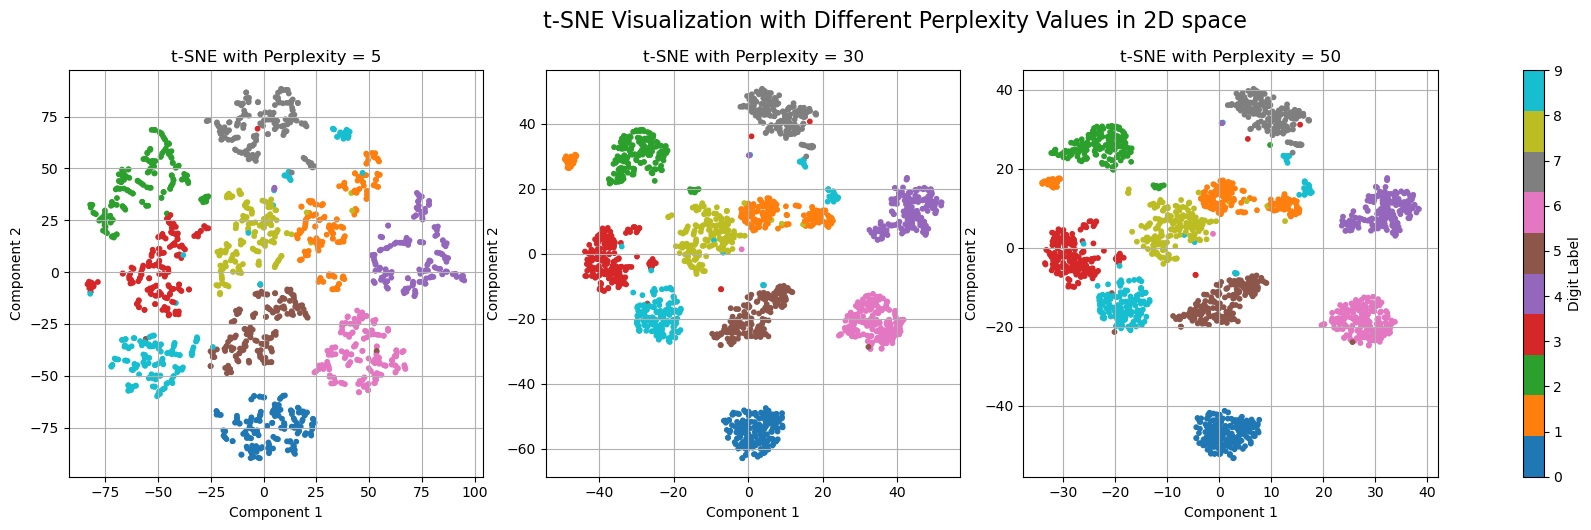

In [17]:
#Question 2 Solution code
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Each sample has", X.shape[1], "features (representing 8x8 images).")

# Applying different perplexities
perplexities = [5, 30, 50]
plt.figure(figsize=(18, 5))

for i, perp in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_embedded = tsne.fit_transform(X)

    plt.subplot(1, 3, i + 1)
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', s=10)
    plt.title(f't-SNE with Perplexity = {perp}')
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)

# Plotting the 2D t-SNE
plt.tight_layout()
plt.suptitle("t-SNE Visualization with Different Perplexity Values in 2D space", fontsize=16, y=1.05)
plt.colorbar(scatter, ax=plt.gcf().get_axes(), label='Digit Label')
plt.savefig("t-SNE visualization with different perplexities in 2D.png",dpi=300)
plt.show()